## Baseline 相关实验

### 数据预处理

In [44]:
# Import the libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

# Algorithms of classification
# Naive Bayes
from sklearn.naive_bayes import GaussianNB
# SVC
from sklearn.svm import SVC
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
# Random Forest
from sklearn.ensemble import RandomForestClassifier
# Logistic Regression
from sklearn.linear_model import LogisticRegression
# K-NN
from sklearn.neighbors import KNeighborsClassifier
# MLP
from sklearn.neural_network import MLPClassifier
# Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier

# Import of library for data split
from sklearn.model_selection import train_test_split
# Confusion matrix
from sklearn.metrics import confusion_matrix, mean_squared_error
# Classification report
from sklearn.metrics import classification_report
# Import the libraries for the metrics
from sklearn.metrics import precision_score, recall_score, f1_score

# Library to calculate the mean and standard deviation used in the characteristics
from sklearn.preprocessing import StandardScaler
# Library Grid Search
from sklearn.model_selection import GridSearchCV

In [45]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from time import time
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import confusion_matrix, roc_curve, accuracy_score, f1_score, roc_auc_score, classification_report
from astropy.table import Table
from sklearn.metrics import roc_auc_score

df = pd.read_csv('D:/students-performance-prediction-UCI\dataset\dadaset_OULAD\studentInfo_AAA_Train.csv')
df = df.drop(columns=['code_module', 'code_presentation', 'id_student'])
df_test = pd.read_csv('D:/students-performance-prediction-UCI\dataset\dadaset_OULAD\studentInfo_AAA_Test.csv')
df_test = df_test.drop(columns=['code_module', 'code_presentation', 'id_student'])
df_test

,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
0,M,East Anglian Region,HE Qualification,90-100%,35-55,0,60,N,Pass
1,M,South East Region,Lower Than A Level,30-40%,35-55,0,120,N,Pass
2,M,London Region,Lower Than A Level,30-40%,35-55,0,60,N,Pass
3,F,East Anglian Region,Lower Than A Level,70-80%,35-55,0,60,N,Pass
4,M,South East Region,A Level or Equivalent,70-80%,0-35,0,120,N,Pass
...,...,...,...,...,...,...,...,...,...
74,M,West Midlands Region,HE Qualification,0-10%,35-55,1,60,N,Fail
75,M,North Western Region,HE Qualification,30-40%,0-35,0,60,N,Fail
76,F,North Region,HE Qualification,10-20,0-35,0,150,N,Fail
77,M,North Western Region,A Level or Equivalent,70-80%,35-55,1,60,N,Fail


In [46]:
# mapping strings to numeric values(df_test_test):
def numerical_data_df_test():
    df_test['gender'] = df_test['gender'].map({'M': 0, 'F': 1})
    df_test['region'] = df_test['region'].map({'East Anglian Region': 0, 'Scotland': 1,'South East Region':2,'West Midlands Region':3,'Wales':4,'North Western Region':5,'North Region':6,'South Region':7,'Ireland':8,'South West Region':9,'East Midlands Region':10,'Yorkshire Region':11,'London Region':12})
    df_test['highest_education'] = df_test['highest_education'].map({'HE Qualification': 0, 'A Level or Equivalent': 1,'Lower Than A Level':2,'Post Graduate Qualification':3})
    df_test['imd_band'] = df_test['imd_band'].map({'0-10%': 0, '10-20': 1,'20-30%':2,'30-40%':3,'40-50%':4,'50-60%':5,'60-70%':6,'70-80%':7,'80-90%':8,'90-100%':9})
    df_test['age_band'] = df_test['age_band'].map({'0-35': 0, '35-55': 1, '55<=': 2})
    df_test['disability'] = df_test['disability'].map({'N': 0, 'Y': 1})
    # df['num_of_prev_attempts'] = df['num_of_prev_attempts'].map({'0': 0})
    # df['studied_credits'] = df['studied_credits'].map({'60': 0, '80': 1,'90':2,'120':3,'150':4,'170':5,'180':6,'240':7,'300':8,'420':9})
    df_test['final_result'] = df_test['final_result'].map({'Fail': 0, 'Pass': 1})
    # reorder dataframe columns :
    col = df_test['final_result']
    # type(col) col的类型为df
    del df_test['final_result']
    df_test['final_result'] = col
    
# feature scaling will allow the algorithm to converge faster, large data will have same scal
#特征缩放操作，使得收敛速度更快，处于同一个数据维度
def feature_scaling(df_test):
    for i in df_test:
        col_test = df_test[i]
        # let's choose col_testumns that have large values
        if(np.max(col_test)>6):
            Max = max(col_test)
            Min = min(col_test)
            mean = np.mean(col_test)
            col_test  = (col_test-mean)/(Max)
            df_test[i] = col_test
        elif(np.max(col_test)<6):
            col_test = (col_test-np.min(col_test))
            col_test /= np.max(col_test)
            df_test[i] = col_test

In [47]:
numerical_data_df_test()
df_test

,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
0,0,0,0,9.0,1,0,60,0,1
1,0,2,2,3.0,1,0,120,0,1
2,0,12,2,3.0,1,0,60,0,1
3,1,0,2,7.0,1,0,60,0,1
4,0,2,1,7.0,0,0,120,0,1
...,...,...,...,...,...,...,...,...,...
74,0,3,0,0.0,1,1,60,0,0
75,0,5,0,3.0,0,0,60,0,0
76,1,6,0,1.0,0,0,150,0,0
77,0,5,1,7.0,1,1,60,0,0


In [48]:
feature_scaling(df_test)
df_test.dropna(inplace=True)
df_test

,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
0,0.0,-0.434599,0.000000,0.373219,0.5,0.0,-0.070464,0.0,1.0
1,0.0,-0.267932,0.666667,-0.293447,0.5,0.0,0.129536,0.0,1.0
2,0.0,0.565401,0.666667,-0.293447,0.5,0.0,-0.070464,0.0,1.0
3,1.0,-0.434599,0.666667,0.150997,0.5,0.0,-0.070464,0.0,1.0
4,0.0,-0.267932,0.333333,0.150997,0.0,0.0,0.129536,0.0,1.0
...,...,...,...,...,...,...,...,...,...
74,0.0,-0.184599,0.000000,-0.626781,0.5,1.0,-0.070464,0.0,0.0
75,0.0,-0.017932,0.000000,-0.293447,0.0,0.0,-0.070464,0.0,0.0
76,1.0,0.065401,0.000000,-0.515670,0.0,0.0,0.229536,0.0,0.0
77,0.0,-0.017932,0.333333,0.150997,0.5,1.0,-0.070464,0.0,0.0


In [49]:
# mapping strings to numeric values(df):
def numerical_data_df():
    df['gender'] = df['gender'].map({'M': 0, 'F': 1})
    df['region'] = df['region'].map({'East Anglian Region': 0, 'Scotland': 1,'South East Region':2,'West Midlands Region':3,'Wales':4,'North Western Region':5,'North Region':6,'South Region':7,'Ireland':8,'South West Region':9,'East Midlands Region':10,'Yorkshire Region':11,'London Region':12})
    df['highest_education'] = df['highest_education'].map({'HE Qualification': 0, 'A Level or Equivalent': 1,'Lower Than A Level':2,'Post Graduate Qualification':3})
    df['imd_band'] = df['imd_band'].map({'0-10%': 0, '10-20': 1,'20-30%':2,'30-40%':3,'40-50%':4,'50-60%':5,'60-70%':6,'70-80%':7,'80-90%':8,'90-100%':9})
    df['age_band'] = df['age_band'].map({'0-35': 0, '35-55': 1, '55<=': 2})
    df['disability'] = df['disability'].map({'N': 0, 'Y': 1})
    # df['num_of_prev_attempts'] = df['num_of_prev_attempts'].map({'0': 0})
    # df['studied_credits'] = df['studied_credits'].map({'60': 0, '80': 1,'90':2,'120':3,'150':4,'170':5,'180':6,'240':7,'300':8,'420':9})
    df['final_result'] = df['final_result'].map({'Fail': 0, 'Pass': 1})
    # reorder dataframe columns :
    col = df['final_result']
    # type(col) col的类型为df
    del df['final_result']
    df['final_result'] = col

# feature scaling will allow the algorithm to converge faster, large data will have same scal
#特征缩放操作，使得收敛速度更快，处于同一个数据维度
def feature_scaling(df):
    for i in df:
        col = df[i]
        # let's choose columns that have large values
        if(np.max(col)>6):
            Max = max(col)
            Min = min(col)
            mean = np.mean(col)
            col  = (col-mean)/(Max)
            df[i] = col
        elif(np.max(col)<6):
            col = (col-np.min(col))
            col /= np.max(col)
            df[i] = col

In [50]:
numerical_data_df()
df

,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
0,1,1,0,2.0,1,0,60,0,1
1,1,2,1,5.0,1,0,60,0,1
2,1,3,2,5.0,0,0,60,0,1
3,0,4,1,8.0,1,0,60,0,1
4,0,1,0,3.0,0,0,60,0,1
...,...,...,...,...,...,...,...,...,...
494,1,2,1,2.0,1,0,60,0,1
495,0,5,1,1.0,1,0,90,0,1
496,0,11,2,4.0,1,0,60,0,1
497,0,5,2,0.0,1,0,120,0,1


In [51]:
feature_scaling(df)
df.dropna(inplace=True)


In [52]:
data = df.to_numpy()
data_test = df_test.to_numpy()
# n = data.shape[1]
x = data[:, : -1]
y = data[:,-1]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=2024)
x_test_true = data_test[:, :-1]
y_test_true = data_test[:, -1]

### Logistic Regression

In [53]:
logisticRegr = LogisticRegression(C=1)

In [54]:
logisticRegr.fit(x_train,y_train)

LogisticRegression(C=1)

#### 评估指标

In [55]:
y_pred_true=logisticRegr.predict(x_test_true)
y_pred_true

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [56]:
# 打印数据报告
print(classification_report(y_test_true, y_pred_true,digits=3,zero_division=0))

print()

              precision    recall  f1-score   support

         0.0      0.000     0.000     0.000        12
         1.0      0.846     1.000     0.917        66

    accuracy                          0.846        78
   macro avg      0.423     0.500     0.458        78
weighted avg      0.716     0.846     0.776        78




In [57]:
mse = mean_squared_error(y_test_true, y_pred_true)
rmse = np.sqrt(mse)
print("RMSE为：", rmse)

RMSE为： 0.3922322702763681


<Axes: >

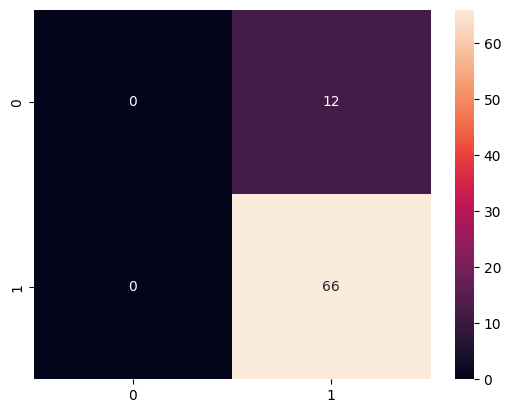

In [58]:
# 混淆矩阵
cm = confusion_matrix(y_test_true, y_pred_true)
sns.heatmap(cm,annot=True)

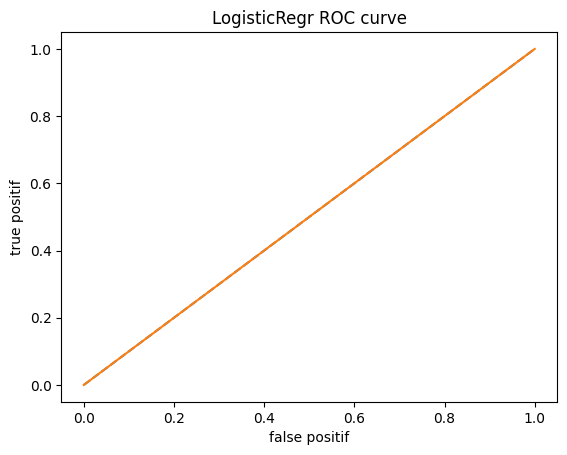

In [59]:
# ROC曲线
fpositif, tpositif, thresholds = roc_curve(y_test_true, y_pred_true)
plt.plot([0,1],[0,1],'--')
plt.plot(fpositif,tpositif, label='LogisticRegr')
plt.xlabel('false positif')
plt.ylabel('true positif')
plt.title('LogisticRegr ROC curve')
p=plt.show()

### k-nearest neighbors

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(x_train)
x_test_true = scaler.transform(x_test_true)

knn = KNeighborsClassifier()

# Parameters
n_neighbors = [1, 3, 5, 10]
weights = ['uniform','distance']
algorithm = ['auto','ball_tree','kd_tree','brute']

grid = dict(n_neighbors = n_neighbors,
            weights = weights,
            algorithm = algorithm)

grid_search = GridSearchCV(estimator = knn, 
                           param_grid = grid, 
                           cv= 10,  
                           verbose=1, 
                           n_jobs=-1,
                           scoring = "accuracy")

searchResults = grid_search.fit(X_train, y_train.ravel())

# Extract the best model and evaluate it
bestModel = searchResults.best_estimator_

print("Best Parameters (GridSearch):", bestModel)
print("-----------------------------------------------------------")

# Object best hyperparameters
lr = bestModel
  
# Train the model with the best hyperparameters
lr.fit(X_train, y_train)
################################################################################################
y_pred_true_knn = lr.predict(x_test_true)
print("y_pred_true_knn",y_pred_true_knn)
# Confusion matrix
print(confusion_matrix(y_test_true, y_pred_true_knn))
# Classification report
print(classification_report(y_test_true, y_pred_true_knn, digits=3,zero_division=0))
mse = mean_squared_error(y_test_true, y_pred_true_knn)
rmse = np.sqrt(mse)
print("RMSE为：", rmse)


AttributeError: 'OutStream' object has no attribute 'buffer'

### SVC

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(x_train)
x_test_true = scaler.transform(x_test_true)

svm = SVC()

# Parameters
gamma =  [0.1, 1.0, 10, 100]
C = [0.1, 1.0, 10, 100]
kernel = ['rbf','linear']

grid = dict(gamma = gamma,
            C = C,
            kernel = kernel)

grid_search = GridSearchCV(estimator = svm, 
                           param_grid = grid, 
                           cv= 10,  
                           verbose=1, 
                           n_jobs=-1,
                           scoring = "accuracy")

searchResults = grid_search.fit(X_train, y_train.ravel())

# Extract the best model and evaluate it
bestModel = searchResults.best_estimator_

print("Best Parameters (GridSearch):", bestModel)
print("-----------------------------------------------------------")

# Object best hyperparameters
svm = bestModel
  
# Train the model with the best hyperparameters
svm.fit(X_train, y_train)
################################################################################################################
pred_svc = svm.predict(x_test_true)

# Confusion matrix
print(confusion_matrix(y_test_true, pred_svc))
# Classification report
print(classification_report(y_test_true, pred_svc,digits=3,zero_division=0))
mse = mean_squared_error(y_test_true,pred_svc)
rmse = np.sqrt(mse)
print("RMSE为：", rmse)

### Naive Bayes

In [ ]:
scaler = StandardScaler()   #将数据的均值调整为0，标准差调整为1.
X_train = scaler.fit_transform(x_train)  
x_test_true = scaler.transform(x_test_true)

nb = GaussianNB()

# Parameters
grid = {
    'var_smoothing': np.logspace(0,-9, num=100)
}

# 寻找最优的超参数
grid_search = GridSearchCV(estimator = nb,      #优化模型 朴素贝叶斯
                           param_grid = grid,   #优化参数
                           cv= 10,              #10折线
                           verbose=1,           #日志的详细程度
                           n_jobs=-1,           #使用可用的所有cpu
                           scoring = "accuracy")

searchResults = grid_search.fit(X_train, y_train.ravel())  #.ravel()将多维数组展为一维数组

# Extract the best model and evaluate it
bestModel = searchResults.best_estimator_

print("Best Parameters (GridSearch):", bestModel)
print("-----------------------------------------------------------")

# Object best hyperparameters
nb = bestModel

# Train the model with the best hyperparameters
nb.fit(X_train, y_train)
#######################################################################################################
pred_nb = nb.predict(x_test_true)  #预测标签

# Confusion matrix
print(confusion_matrix(y_test_true, pred_nb))
# Classification report
print(classification_report(y_test_true, pred_nb, digits=3,zero_division=0))
mse = mean_squared_error(y_test_true,pred_nb)
rmse = np.sqrt(mse)
print("RMSE为：", rmse)

### Decision Tree

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(x_train)
x_test_true = scaler.transform(x_test_true)

dt = DecisionTreeClassifier()

# Parameters
max_depth = [2, 3, 5, 10, 20]
min_samples_leaf =  [5, 10, 20, 50, 100]
criterion = ["gini", "entropy"]

grid = dict(max_depth = max_depth,
            min_samples_leaf = min_samples_leaf,
            criterion = criterion)

grid_search = GridSearchCV(estimator = dt, 
                           param_grid = grid, 
                           cv= 10,  
                           verbose=1, 
                           n_jobs=-1,
                           scoring = "accuracy")

searchResults = grid_search.fit(X_train, y_train.ravel())

# Extract the best model and evaluate it
bestModel = searchResults.best_estimator_

print("Best Parameters (GridSearch):", bestModel)
print("-----------------------------------------------------------")

# Object best hyperparameters
dtc = bestModel
  
# Train the model with the best hyperparameters
dtc.fit(X_train, y_train)
###############################################################################
pred_dt = dtc.predict(x_test_true)

# Confusion matrix
print(confusion_matrix(y_test_true, pred_dt))
# Classification report
print(classification_report(y_test_true, pred_dt, digits=3))
mse = mean_squared_error(y_test_true,pred_dt)
rmse = np.sqrt(mse)
print("RMSE为：", rmse)

### Random Forest

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(x_train)
x_test_true = scaler.transform(x_test_true)

rf = RandomForestClassifier()

# Parameters
bootstrap = [True, False]
max_depth = [10, 20, 50, 100, None]
max_features = ['sqrt', 'log2', None]
min_samples_leaf = [1, 2, 4]
min_samples_split = [2, 5, 10]
n_estimators = [5, 20, 50, 100]

grid = dict(bootstrap = bootstrap, 
            max_depth = max_depth,
            max_features = max_features,
            min_samples_leaf = min_samples_leaf,
            min_samples_split = min_samples_split,
            n_estimators = n_estimators)

grid_search = GridSearchCV(estimator = rf, 
                           param_grid = grid, 
                           cv= 10,  
                           verbose=1, 
                           n_jobs=-1,
                           scoring = "accuracy")

searchResults = grid_search.fit(X_train, y_train.ravel())

# Extract the best model and evaluate it
bestModel = searchResults.best_estimator_

print("Best Parameters (GridSearch):", bestModel)
print("-----------------------------------------------------------")

# Object best hyperparameters
rf = bestModel
  
# Train the model with the best hyperparameters
rf.fit(X_train, y_train)
##########################################################################################################################
pred_RF = rf.predict(x_test_true)

# Confusion matrix
print(confusion_matrix(y_test_true, pred_RF))
# Classification report
print(classification_report(y_test_true, pred_RF, digits=3))
mse = mean_squared_error(y_test_true,pred_RF)
rmse = np.sqrt(mse)
print("RMSE为：", rmse)

### MLP

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(x_train)
x_test_true = scaler.transform(x_test_true)

mlp = MLPClassifier(max_iter=150)

# Parameters
hidden_layer_sizes = [(10,),(20,),(50,),(100,)]
activation = ['tanh', 'relu']
solver = ['sgd', 'adam']
alpha = [0.0001, 0.05]
learning_rate =  ['constant','adaptive']


grid = dict(hidden_layer_sizes = hidden_layer_sizes,
            activation = activation, 
            solver = solver,
            alpha = alpha,
            learning_rate = learning_rate)

grid_search = GridSearchCV(estimator = mlp, 
                           param_grid = grid, 
                           cv= 10,  
                           verbose=1, 
                           n_jobs=-1,
                           scoring = "accuracy")

searchResults = grid_search.fit(X_train, y_train.ravel())

# Extract the best model and evaluate it
bestModel = searchResults.best_estimator_

print("Best Parameters (GridSearch):", bestModel)
print("-----------------------------------------------------------")

# Object best hyperparameters
lr = bestModel
  
# Train the model with the best hyperparameters
lr.fit(X_train, y_train)
#########################################################################################################
pred_mlp = lr.predict(x_test_true)

# Confusion matrix
print(confusion_matrix(y_test_true, pred_mlp))
# Classification report
print(classification_report(y_test_true, pred_mlp, digits=3))
mse = mean_squared_error(y_test_true,pred_mlp)
rmse = np.sqrt(mse)
print("RMSE为：", rmse)

### GBC

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(x_train)
x_test_true = scaler.transform(x_test_true)

gbc = GradientBoostingClassifier()

# Parameters
learning_rate = [0.01, 0.05, 0.1, 0.15, 0.2]
criterion = ['friedman_mse', 'squared_error']
max_depth = [3,5,8]
max_features = ['log2','sqrt']

grid = dict(learning_rate = learning_rate,
            criterion = criterion,
            max_depth = max_depth,
            max_features = max_features)

grid_search = GridSearchCV(estimator = gbc, 
                           param_grid = grid, 
                           cv= 10,  
                           verbose=1, 
                           n_jobs=-1,
                           scoring = "accuracy")

searchResults = grid_search.fit(X_train, y_train.ravel())

# Extract the best model and evaluate it
bestModel = searchResults.best_estimator_

print("Best Parameters (GridSearch):", bestModel)
print("-----------------------------------------------------------")

# Object best hyperparameters
gbc = bestModel
  
# Train the model with the best hyperparameters
gbc.fit(X_train, y_train)
############################################################################################
pred_gbc = gbc.predict(x_test_true)

# Confusion matrix
print(confusion_matrix(y_test_true, pred_gbc))
# Classification report
print(classification_report(y_test_true, pred_gbc, digits=3))
mse = mean_squared_error(y_test_true,pred_gbc)
rmse = np.sqrt(mse)
print("RMSE为：", rmse)